In [4]:
import pandas as pd
df  = pd.read_csv('Reservas estancias días hotel procesado 9 ciudad y id y cluster - precio.csv', encoding='ISO-8859-1', delimiter=';')

In [5]:
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def preparar_datos_lstm(data, n_steps):
    """
    Prepara los datos para el LSTM creando secuencias.
    data: numpy array con los datos escalados
    n_steps: número de pasos a incluir en cada secuencia
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])  # Todas las columnas menos la última (target)
        y.append(data[i + n_steps, -1])  # La última columna como target
    return np.array(X), np.array(y)

# Paso 1: Normalizar los datos (se convierte a numpy array)
scaler = MinMaxScaler()
cluster_0_scaled = scaler.fit_transform(cluster_0)  # Esto genera un array de NumPy
cluster_1_scaled = scaler.fit_transform(cluster_1)
cluster_2_scaled = scaler.fit_transform(cluster_2)

# Paso 2: Definir el número de pasos de la secuencia
n_steps = 10

# Paso 3: Preparar los datos para cada clúster (ya es un array de NumPy)
X_cluster_0, y_cluster_0 = preparar_datos_lstm(cluster_0_scaled, n_steps)
X_cluster_1, y_cluster_1 = preparar_datos_lstm(cluster_1_scaled, n_steps)
X_cluster_2, y_cluster_2 = preparar_datos_lstm(cluster_2_scaled, n_steps)

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_cluster_0, y_cluster_0, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.2, random_state=42)

# A partir de los datos de entrenamiento, dividir en entrenamiento y validación
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X_train_0, y_train_0, test_size=0.25, random_state=42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.25, random_state=42)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.25, random_state=42)
# (Ahora tienes 60% entrenamiento, 20% validación, 20% prueba)



In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def crear_modelo_lstm(n_steps, n_features):
    """
    Crea un modelo LSTM con una capa LSTM y una capa Dense.
    """
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Obtener el número de características (n_features) a partir de los datos escalados
n_features = X_cluster_0.shape[2]

# Crear y entrenar el modelo para cada clúster
modelo_cluster_0 = crear_modelo_lstm(n_steps, n_features)
history0 = modelo_cluster_0.fit(X_train_0, y_train_0, 
                               epochs=15, 
                               validation_data=(X_val_0, y_val_0),
                               verbose=1)







Epoch 1/15

1312/1312 [==============================] - 20s 12ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 2/15
1312/1312 [==============================] - 16s 13ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 3/15
1312/1312 [==============================] - 17s 13ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 4/15
1312/1312 [==============================] - 17s 13ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 5/15
1312/1312 [==============================] - 18s 14ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 6/15
1312/1312 [==============================] - 22s 17ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/15
1312/1312 [==============================] - 19s 15ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/15
1312/1312 [==============================] - 15s 12ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/15
1312/1312 [==============================] - 18s 14ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/15
1312/1312 [==============================] - 16s 

In [8]:
modelo_cluster_1 = crear_modelo_lstm(n_steps, n_features)
history1 = modelo_cluster_0.fit(X_train_1, y_train_1, 
                               epochs=15, 
                               validation_data=(X_val_1, y_val_1),
                               verbose=1)

Epoch 1/15
1770/1770 [==============================] - 21s 12ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 2/15
1770/1770 [==============================] - 20s 11ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 3/15
1770/1770 [==============================] - 20s 11ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 4/15
1770/1770 [==============================] - 20s 11ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 5/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/15
1770/1770 [==============================] - 20s 11ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 7/15
1770/1770 [==============================] - 20s 11ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/15
1770/1770 [==============================] - 22s 12ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 10/15
1770/1770 [==============================] - 19s 11m

In [9]:
modelo_cluster_2 = crear_modelo_lstm(n_steps, n_features)
history2 = modelo_cluster_0.fit(X_train_2, y_train_2, 
                               epochs=15, 
                               validation_data=(X_val_2, y_val_2),
                               verbose=1)


Epoch 1/15
2201/2201 [==============================] - 27s 12ms/step - loss: 9.0658e-04 - val_loss: 4.0715e-04
Epoch 2/15
2201/2201 [==============================] - 35s 16ms/step - loss: 3.7538e-04 - val_loss: 2.9375e-04
Epoch 3/15
2201/2201 [==============================] - 30s 14ms/step - loss: 2.6779e-04 - val_loss: 2.2908e-04
Epoch 6/15
2201/2201 [==============================] - 36s 16ms/step - loss: 2.5226e-04 - val_loss: 2.1978e-04
Epoch 7/15
2201/2201 [==============================] - 33s 15ms/step - loss: 2.4129e-04 - val_loss: 2.2252e-04
Epoch 8/15
2201/2201 [==============================] - 28s 13ms/step - loss: 2.3178e-04 - val_loss: 2.5008e-04
Epoch 9/15
2201/2201 [==============================] - 24s 11ms/step - loss: 2.2670e-04 - val_loss: 1.7957e-04
Epoch 10/15
2201/2201 [==============================] - 26s 12ms/step - loss: 2.1870e-04 - val_loss: 1.7947e-04
Epoch 11/15
2201/2201 [==============================] - 25s 11ms/step - loss: 2.1487e-04 - val_loss: 3

In [10]:
# Evaluar el modelo en los datos de prueba
test_loss0 = modelo_cluster_0.evaluate(X_test_0, y_test_0)
print(f"Test Loss for Cluster 0: {test_loss0}")

test_loss1 = modelo_cluster_1.evaluate(X_test_1, y_test_1)
print(f"Test Loss for Cluster 1: {test_loss1}")

test_loss2 = modelo_cluster_2.evaluate(X_test_2, y_test_2)
print(f"Test Loss for Cluster 2: {test_loss2}")


438/438 [==============================] - 3s 6ms/step - loss: 0.0206
Test Loss for Cluster 0: 0.020614052191376686
590/590 [==============================] - 4s 5ms/step - loss: 0.1816
Test Loss for Cluster 1: 0.18161937594413757
734/734 [==============================] - 5s 6ms/step - loss: 0.0316
Test Loss for Cluster 2: 0.0316176563501358


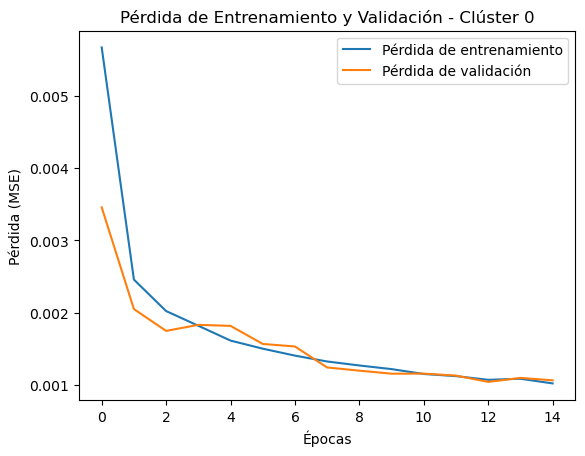

In [11]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history0.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history0.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Clúster 0')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

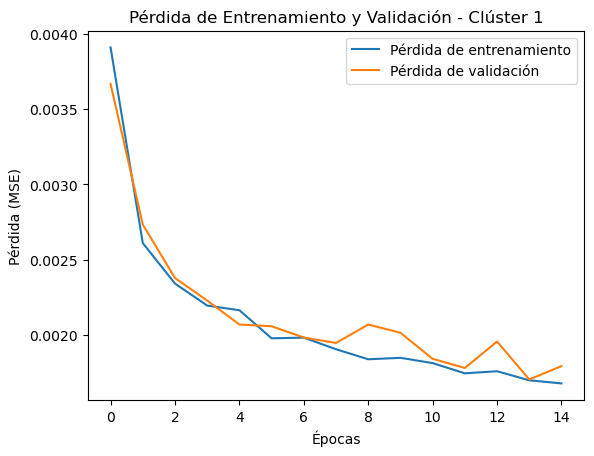

In [12]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Clúster 1')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

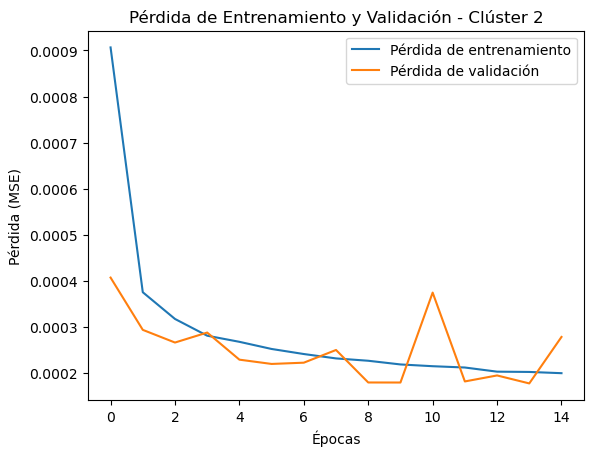

In [13]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Clúster 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

In [14]:
# Evaluar el modelo en los datos de prueba (MSE es la métrica que usamos en la compilación del modelo)
test_loss_mse0 = modelo_cluster_0.evaluate(X_test_0, y_test_0)
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse0}')

# Evaluar el modelo en los datos de prueba (MSE es la métrica que usamos en la compilación del modelo)
test_loss_mse1 = modelo_cluster_1.evaluate(X_test_1, y_test_1)
print(f'MSE (Pérdida) en datos de prueba - Clúster 1: {test_loss_mse1}')

# Evaluar el modelo en los datos de prueba (MSE es la métrica que usamos en la compilación del modelo)
test_loss_mse2 = modelo_cluster_2.evaluate(X_test_2, y_test_2)
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse2}')

438/438 [==============================] - 2s 5ms/step - loss: 0.0206
MSE (Pérdida) en datos de prueba - Clúster 0: 0.020614052191376686
590/590 [==============================] - 3s 5ms/step - loss: 0.1816
MSE (Pérdida) en datos de prueba - Clúster 1: 0.18161937594413757
734/734 [==============================] - 4s 6ms/step - loss: 0.0316
MSE (Pérdida) en datos de prueba - Clúster 0: 0.0316176563501358


In [15]:
# Hacer predicciones en los datos de prueba
y_pred_0 = modelo_cluster_0.predict(X_test_0)

# Hacer predicciones en los datos de prueba
y_pred_1 = modelo_cluster_1.predict(X_test_1)

# Hacer predicciones en los datos de prueba
y_pred_2 = modelo_cluster_2.predict(X_test_2)

734/734 [==============================] - 4s 5ms/step


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcular el MSE y RMSE
mse0 = mean_squared_error(y_test_0, y_pred_0)
rmse0 = np.sqrt(mse0)
print(f'RMSE en datos de prueba - Clúster 0: {rmse0}')

# Calcular el MAE
mae0 = mean_absolute_error(y_test_0, y_pred_0)
print(f'MAE en datos de prueba - Clúster 0: {mae0}')





# Calcular el MSE y RMSE
mse1 = mean_squared_error(y_test_1, y_pred_1)
rmse1 = np.sqrt(mse1)
print(f'RMSE en datos de prueba - Clúster 1: {rmse1}')

# Calcular el MAE
mae1 = mean_absolute_error(y_test_1, y_pred_1)
print(f'MAE en datos de prueba - Clúster 1: {mae1}')





# Calcular el MSE y RMSE
mse2 = mean_squared_error(y_test_2, y_pred_2)
rmse2 = np.sqrt(mse2)
print(f'RMSE en datos de prueba - Clúster 2: {rmse2}')

# Calcular el MAE
mae2 = mean_absolute_error(y_test_2, y_pred_2)
print(f'MAE en datos de prueba - Clúster 2: {mae2}')


RMSE en datos de prueba - Clúster 0: 0.14357590799281067
MAE en datos de prueba - Clúster 0: 0.0967727661703258
RMSE en datos de prueba - Clúster 1: 0.4261682613007851
MAE en datos de prueba - Clúster 1: 0.37906785137679067
RMSE en datos de prueba - Clúster 2: 0.1778135398554792
MAE en datos de prueba - Clúster 2: 0.12534853394688641


In [17]:
# MSE ya lo obtuvimos durante la evaluación del modelo
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse0}')
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse1}')
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse2}')

# RMSE
print(f'RMSE en datos de prueba - Clúster 0: {rmse0}')
print(f'RMSE en datos de prueba - Clúster 0: {rmse1}')
print(f'RMSE en datos de prueba - Clúster 0: {rmse2}')

# MAE
print(f'MAE en datos de prueba - Clúster 0: {mae0}')
print(f'MAE en datos de prueba - Clúster 0: {mae1}')
print(f'MAE en datos de prueba - Clúster 0: {mae2}')


MSE (Pérdida) en datos de prueba - Clúster 0: 0.020614052191376686
MSE (Pérdida) en datos de prueba - Clúster 0: 0.18161937594413757
MSE (Pérdida) en datos de prueba - Clúster 0: 0.0316176563501358
RMSE en datos de prueba - Clúster 0: 0.14357590799281067
RMSE en datos de prueba - Clúster 0: 0.4261682613007851
RMSE en datos de prueba - Clúster 0: 0.1778135398554792
MAE en datos de prueba - Clúster 0: 0.0967727661703258
MAE en datos de prueba - Clúster 0: 0.37906785137679067
MAE en datos de prueba - Clúster 0: 0.12534853394688641


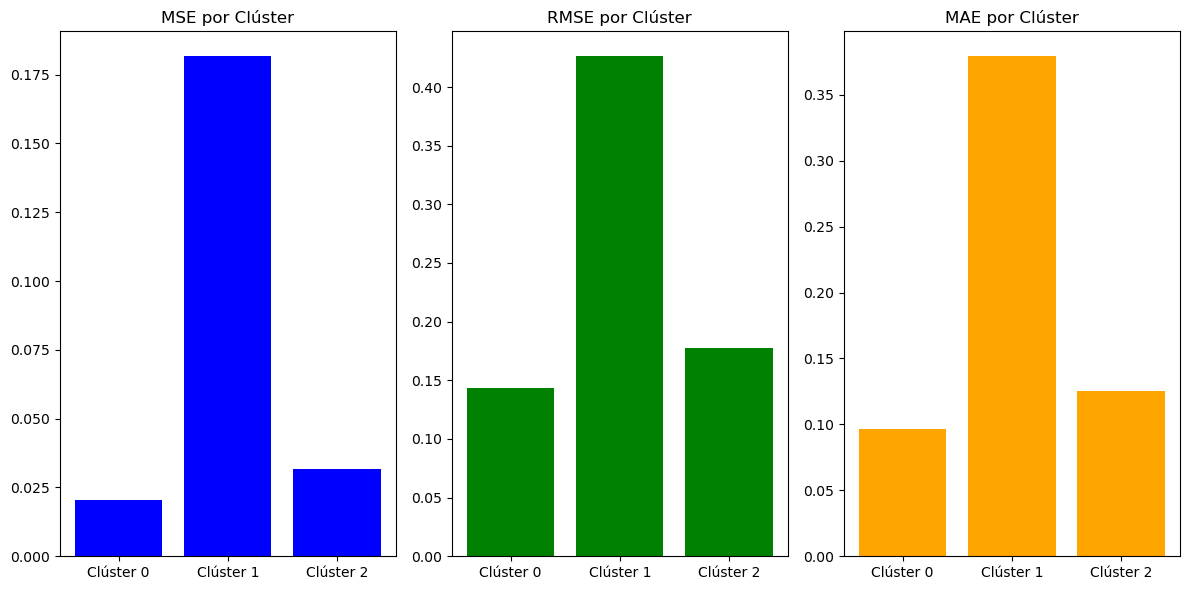

In [18]:
import matplotlib.pyplot as plt

# Métricas para cada clúster
mse_values = [test_loss_mse0, test_loss_mse1, test_loss_mse2]
rmse_values = [rmse0, rmse1, rmse2]
mae_values = [mae0, mae1, mae2]

# Graficar las métricas
clusters = ['Clúster 0', 'Clúster 1', 'Clúster 2']

plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
plt.bar(clusters, mse_values, color='blue')
plt.title('MSE por Clúster')

# RMSE
plt.subplot(1, 3, 2)
plt.bar(clusters, rmse_values, color='green')
plt.title('RMSE por Clúster')

# MAE
plt.subplot(1, 3, 3)
plt.bar(clusters, mae_values, color='orange')
plt.title('MAE por Clúster')

plt.tight_layout()
plt.show()


In [19]:
# Guardar el modelo para el Clúster 0
modelo_cluster_0.save('modelo_cluster_prices_0.h5')

# Guardar el modelo para el Clúster 1
modelo_cluster_1.save('modelo_cluster_prices_1.h5')

# Guardar el modelo para el Clúster 2
modelo_cluster_2.save('modelo_cluster_prices_2.h5')


C:\Users\Igna\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
def calcular_mape(y_real, y_pred):
    """
    Calcula el Mean Absolute Percentage Error (MAPE).
    
    y_real: Array o lista de los valores reales.
    y_pred: Array o lista de los valores predichos.
    """
    y_real, y_pred = np.array(y_real), np.array(y_pred)
    
    # Evitar división por cero
    epsilon = np.finfo(np.float32).eps
    y_real_safe = np.where(y_real == 0, epsilon, y_real)
    
    return np.mean(np.abs((y_real - y_pred) / y_real_safe)) * 100

In [21]:
y_pred_0 = modelo_cluster_0.predict(X_test_0)  # Predicciones del modelo para el Clúster 0
mape_cluster_0 = calcular_mape(y_test_0, y_pred_0)

print(f'MAPE para el Clúster 0: {mape_cluster_0}%')

438/438 [==============================] - 2s 5ms/step
MAPE para el Clúster 0: 1178675.8369319695%


In [22]:
y_pred_1 = modelo_cluster_1.predict(X_test_1)  # Predicciones del modelo para el Clúster 0
mape_cluster_1 = calcular_mape(y_test_1, y_pred_1)

print(f'MAPE para el Clúster 1: {mape_cluster_1}%')

590/590 [==============================] - 3s 5ms/step
MAPE para el Clúster 1: 7649078.848317537%


In [23]:
y_pred_2 = modelo_cluster_2.predict(X_test_2)  # Predicciones del modelo para el Clúster 0
mape_cluster_2 = calcular_mape(y_test_2, y_pred_2)

print(f'MAPE para el Clúster 2: {mape_cluster_2}%')

734/734 [==============================] - 4s 5ms/step
MAPE para el Clúster 2: 1625148.2189162835%


In [ ]:
#Pronóstico futuro (Opcional)
dias_a_predecir = 7
input_datos = ocupacion_scaled[-pasos:]  # Usamos los últimos 30 días

predicciones_futuras = []

for _ in range(dias_a_predecir):
    # Redimensionamos los datos para que sean compatibles con LSTM
    input_datos_reshaped = input_datos.reshape(1, pasos, 1)
    
    # Hacemos la predicción
    prediccion = model.predict(input_datos_reshaped)
    predicciones_futuras.append(prediccion[0, 0])
    
    # Agregamos la nueva predicción a la secuencia y eliminamos el valor más antiguo
    input_datos = np.append(input_datos[1:], prediccion, axis=0)

# Desescalamos las predicciones
predicciones_futuras = scaler.inverse_transform(np.array(predicciones_futuras).reshape(-1, 1))

print("Predicciones futuras para los próximos días:")
print(predicciones_futuras)
